# Model Testing

## Intructions

Construct a deep neural network. Write a notebook that first implements the data loading process of the two .csv files: attributes and classes. Then, split the dataset into three partitions: 80% for training, 10% for development testing, and the remaining 10% for final testing purposes. Finally, follow the deep-neural-network construction process to find the neural architecture and other hyperparameters that achieve the best performance in classification accuracy. 

Consider a Bayesian error of 5% (minimum error); i.e., the human error that hotel managers (experts) make when predicting if customers will cancel their bookings. You can use the notebook that implements the deep neural model in Keras to estimate the median house value studied in class as a starting point for this task. Note that we are dealing with a binary classification problem, therefore, we only need one output neuron with the Sigmoid activation function. Moreover, the loss function should be the binary crossentropy and the binary accuracy as a metric.

Links :
* [Keras Metrics](https://keras.io/api/metrics/)
* [Keras Activations](https://keras.io/api/layers/activations/)
* [Keras Losses](https://keras.io/api/losses/)
* [Keras Initializers](https://keras.io/api/layers/initializers/)

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
abs_path = '/Users/paul/Library/Mobile Documents/com~apple~CloudDocs/Professionnel/GI05/A6 - NN and DL/Project_Units_1-2/DL/data/prep/'

df_x = pd.read_csv(abs_path + 'HotelReservationsPreparedCleanX.csv')
df_t = pd.read_csv(abs_path + 'HotelReservationsY.csv')

In [3]:
seed = 0

In [4]:
df_x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.0,-0.6,-1.000000,-0.882353,-1.0,1.0,-1.0,-0.990971,0.454545,-0.933333,0.0,-1.0,-1.0,-1.0,-0.044444,-0.6
1,0.0,-1.0,-1.000000,-0.764706,0.0,-1.0,0.0,-0.823928,0.272727,-0.133333,-1.0,-1.0,-1.0,-1.0,-0.624074,-1.0
2,0.0,-1.0,-0.428571,-0.764706,-1.0,-1.0,0.0,-0.936795,1.000000,0.733333,0.0,-1.0,-1.0,-1.0,-0.603704,-1.0
3,0.0,-1.0,-1.000000,-0.882353,0.0,-1.0,0.0,-0.548533,0.636364,0.000000,-1.0,-1.0,-1.0,-1.0,-0.600000,-1.0
4,-0.5,-1.0,-1.000000,-0.882353,0.0,-1.0,0.0,-0.002257,0.272727,-0.266667,-1.0,-1.0,-1.0,-1.0,-0.729630,-1.0


In [5]:
df_t.head()

,booking_status
0,1
1,1
2,1
3,0
4,1


In [6]:
df = pd.concat([df_x, df_t], axis = 1)
df = shuffle(df, random_state=seed)
X_train, X_test, t_train, t_test = train_test_split(df_x, df_t, stratify=df_t, test_size=0.2, random_state=seed)
X_test, X_val, t_test, t_val = train_test_split(X_test, t_test, stratify=t_test, test_size=0.5, random_state=seed)

input_shape = X_train.shape[1]
output_shape = t_train.shape[1]

print(X_train.shape)
print(t_train.shape)
print(X_val.shape)
print(t_val.shape)

(29016, 16)
(29016, 1)
(3627, 16)
(3627, 1)


## Attempt 1

In [ ]:
from keras.models import Sequential

model = Sequential(name = "Model_1")

model.add(keras.layers.InputLayer(input_shape= input_shape, batch_size=None))
model.add(keras.layers.Dense(units=1000,activation= keras.backend.tanh))
model.add(keras.layers.Dense(units= output_shape, activation= keras.backend.sigmoid))

model.summary()

In [ ]:
model.compile(loss = keras.losses.binary_crossentropy, 
              optimizer= keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics= keras.metrics.binary_accuracy)

In [ ]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

history = model.fit(X_train, t_train, epochs=100, verbose=1, validation_data=(
    X_val, t_val), callbacks=[tensorboard_callback])

Cell output :

`Epoch 1/100
2023-11-13 13:05:47.910508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
907/907 [==============================] - ETA: 0s - loss: 0.4646 - binary_accuracy: 0.77742023-11-13 13:05:54.135805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
907/907 [==============================] - 7s 7ms/step - loss: 0.4646 - binary_accuracy: 0.7774 - val_loss: 0.4572 - val_binary_accuracy: 0.7792
Epoch 2/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4508 - binary_accuracy: 0.7873 - val_loss: 0.4512 - val_binary_accuracy: 0.7808
Epoch 3/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4493 - binary_accuracy: 0.7890 - val_loss: 0.4620 - val_binary_accuracy: 0.7814
Epoch 4/100
907/907 [==============================] - 7s 8ms/step - loss: 0.4466 - binary_accuracy: 0.7892 - val_loss: 0.4537 - val_binary_accuracy: 0.7814
Epoch 5/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4470 - binary_accuracy: 0.7897 - val_loss: 0.4519 - val_binary_accuracy: 0.7833
Epoch 6/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4463 - binary_accuracy: 0.7889 - val_loss: 0.4543 - val_binary_accuracy: 0.7808
Epoch 7/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4459 - binary_accuracy: 0.7902 - val_loss: 0.4494 - val_binary_accuracy: 0.7792
Epoch 8/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4425 - binary_accuracy: 0.7912 - val_loss: 0.4551 - val_binary_accuracy: 0.7866
Epoch 9/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4384 - binary_accuracy: 0.7934 - val_loss: 0.4432 - val_binary_accuracy: 0.7841
Epoch 10/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4357 - binary_accuracy: 0.7953 - val_loss: 0.4458 - val_binary_accuracy: 0.7844
Epoch 11/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4332 - binary_accuracy: 0.7967 - val_loss: 0.4541 - val_binary_accuracy: 0.7805
Epoch 12/100
907/907 [==============================] - 7s 8ms/step - loss: 0.4308 - binary_accuracy: 0.7990 - val_loss: 0.4388 - val_binary_accuracy: 0.7929
Epoch 13/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4304 - binary_accuracy: 0.7995 - val_loss: 0.4380 - val_binary_accuracy: 0.7932
Epoch 14/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4293 - binary_accuracy: 0.8011 - val_loss: 0.4381 - val_binary_accuracy: 0.7883
Epoch 15/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4284 - binary_accuracy: 0.8001 - val_loss: 0.4342 - val_binary_accuracy: 0.7968
Epoch 16/100
907/907 [==============================] - 7s 8ms/step - loss: 0.4275 - binary_accuracy: 0.8008 - val_loss: 0.4356 - val_binary_accuracy: 0.7935
Epoch 17/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4272 - binary_accuracy: 0.8009 - val_loss: 0.4327 - val_binary_accuracy: 0.7976
Epoch 18/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4260 - binary_accuracy: 0.8015 - val_loss: 0.4361 - val_binary_accuracy: 0.7935
Epoch 19/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4252 - binary_accuracy: 0.8016 - val_loss: 0.4320 - val_binary_accuracy: 0.7974
Epoch 20/100
907/907 [==============================] - 7s 8ms/step - loss: 0.4246 - binary_accuracy: 0.8004 - val_loss: 0.4339 - val_binary_accuracy: 0.7929
Epoch 21/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4239 - binary_accuracy: 0.8019 - val_loss: 0.4317 - val_binary_accuracy: 0.7974
Epoch 22/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4243 - binary_accuracy: 0.8007 - val_loss: 0.4439 - val_binary_accuracy: 0.7838
Epoch 23/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4222 - binary_accuracy: 0.8019 - val_loss: 0.4319 - val_binary_accuracy: 0.7940
Epoch 24/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4217 - binary_accuracy: 0.8021 - val_loss: 0.4307 - val_binary_accuracy: 0.8001
Epoch 25/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4207 - binary_accuracy: 0.8022 - val_loss: 0.4286 - val_binary_accuracy: 0.7932
Epoch 26/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4205 - binary_accuracy: 0.8026 - val_loss: 0.4401 - val_binary_accuracy: 0.7827
Epoch 27/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4194 - binary_accuracy: 0.8028 - val_loss: 0.4285 - val_binary_accuracy: 0.7993
Epoch 28/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4193 - binary_accuracy: 0.8035 - val_loss: 0.4482 - val_binary_accuracy: 0.7971
Epoch 29/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4182 - binary_accuracy: 0.8021 - val_loss: 0.4272 - val_binary_accuracy: 0.7968
Epoch 30/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4173 - binary_accuracy: 0.8048 - val_loss: 0.4333 - val_binary_accuracy: 0.8007
Epoch 31/100
907/907 [==============================] - 7s 8ms/step - loss: 0.4159 - binary_accuracy: 0.8053 - val_loss: 0.4301 - val_binary_accuracy: 0.7979
Epoch 32/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4154 - binary_accuracy: 0.8056 - val_loss: 0.4218 - val_binary_accuracy: 0.8031
Epoch 33/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4138 - binary_accuracy: 0.8039 - val_loss: 0.4249 - val_binary_accuracy: 0.7929
Epoch 34/100
907/907 [==============================] - 7s 8ms/step - loss: 0.4127 - binary_accuracy: 0.8060 - val_loss: 0.4222 - val_binary_accuracy: 0.8026
Epoch 35/100
907/907 [==============================] - 7s 8ms/step - loss: 0.4124 - binary_accuracy: 0.8074 - val_loss: 0.4206 - val_binary_accuracy: 0.8029
Epoch 36/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4110 - binary_accuracy: 0.8077 - val_loss: 0.4200 - val_binary_accuracy: 0.8048
Epoch 37/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4099 - binary_accuracy: 0.8083 - val_loss: 0.4177 - val_binary_accuracy: 0.8023
Epoch 38/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4081 - binary_accuracy: 0.8083 - val_loss: 0.4203 - val_binary_accuracy: 0.8026
Epoch 39/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4076 - binary_accuracy: 0.8093 - val_loss: 0.4178 - val_binary_accuracy: 0.8048
Epoch 40/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4065 - binary_accuracy: 0.8114 - val_loss: 0.4146 - val_binary_accuracy: 0.8081
Epoch 41/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4052 - binary_accuracy: 0.8127 - val_loss: 0.4171 - val_binary_accuracy: 0.8067
Epoch 42/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4043 - binary_accuracy: 0.8113 - val_loss: 0.4149 - val_binary_accuracy: 0.8048
Epoch 43/100
907/907 [==============================] - 7s 7ms/step - loss: 0.4030 - binary_accuracy: 0.8134 - val_loss: 0.4142 - val_binary_accuracy: 0.8053
Epoch 44/100
907/907 [==============================] - 6s 7ms/step - loss: 0.4016 - binary_accuracy: 0.8144 - val_loss: 0.4131 - val_binary_accuracy: 0.8070
Epoch 45/100
907/907 [==============================] - 7s 8ms/step - loss: 0.4010 - binary_accuracy: 0.8152 - val_loss: 0.4160 - val_binary_accuracy: 0.8084
Epoch 46/100
907/907 [==============================] - 7s 8ms/step - loss: 0.3997 - binary_accuracy: 0.8156 - val_loss: 0.4192 - val_binary_accuracy: 0.8007
Epoch 47/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3986 - binary_accuracy: 0.8155 - val_loss: 0.4089 - val_binary_accuracy: 0.8106
Epoch 48/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3984 - binary_accuracy: 0.8164 - val_loss: 0.4124 - val_binary_accuracy: 0.8122
Epoch 49/100
907/907 [==============================] - 7s 8ms/step - loss: 0.3982 - binary_accuracy: 0.8171 - val_loss: 0.4087 - val_binary_accuracy: 0.8120
Epoch 50/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3968 - binary_accuracy: 0.8166 - val_loss: 0.4093 - val_binary_accuracy: 0.8092
Epoch 51/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3954 - binary_accuracy: 0.8185 - val_loss: 0.4100 - val_binary_accuracy: 0.8120
Epoch 52/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3951 - binary_accuracy: 0.8168 - val_loss: 0.4106 - val_binary_accuracy: 0.8073
Epoch 53/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3950 - binary_accuracy: 0.8196 - val_loss: 0.4065 - val_binary_accuracy: 0.8128
Epoch 54/100
907/907 [==============================] - 6s 6ms/step - loss: 0.3942 - binary_accuracy: 0.8190 - val_loss: 0.4071 - val_binary_accuracy: 0.8114
Epoch 55/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3936 - binary_accuracy: 0.8186 - val_loss: 0.4055 - val_binary_accuracy: 0.8120
Epoch 56/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3925 - binary_accuracy: 0.8191 - val_loss: 0.4068 - val_binary_accuracy: 0.8139
Epoch 57/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3922 - binary_accuracy: 0.8192 - val_loss: 0.4048 - val_binary_accuracy: 0.8131
Epoch 58/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3912 - binary_accuracy: 0.8189 - val_loss: 0.4043 - val_binary_accuracy: 0.8158
Epoch 59/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3912 - binary_accuracy: 0.8209 - val_loss: 0.4041 - val_binary_accuracy: 0.8120
Epoch 60/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3902 - binary_accuracy: 0.8198 - val_loss: 0.4032 - val_binary_accuracy: 0.8183
Epoch 61/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3895 - binary_accuracy: 0.8228 - val_loss: 0.4039 - val_binary_accuracy: 0.8144
Epoch 62/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3899 - binary_accuracy: 0.8211 - val_loss: 0.4088 - val_binary_accuracy: 0.8089
Epoch 63/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3896 - binary_accuracy: 0.8209 - val_loss: 0.4028 - val_binary_accuracy: 0.8133
Epoch 64/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3884 - binary_accuracy: 0.8227 - val_loss: 0.4062 - val_binary_accuracy: 0.8125
Epoch 65/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3892 - binary_accuracy: 0.8230 - val_loss: 0.4063 - val_binary_accuracy: 0.8142
Epoch 66/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3881 - binary_accuracy: 0.8217 - val_loss: 0.4019 - val_binary_accuracy: 0.8161
Epoch 67/100
907/907 [==============================] - 6s 6ms/step - loss: 0.3874 - binary_accuracy: 0.8228 - val_loss: 0.4035 - val_binary_accuracy: 0.8158
Epoch 68/100
907/907 [==============================] - 7s 8ms/step - loss: 0.3870 - binary_accuracy: 0.8248 - val_loss: 0.4005 - val_binary_accuracy: 0.8178
Epoch 69/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3870 - binary_accuracy: 0.8241 - val_loss: 0.4022 - val_binary_accuracy: 0.8164
Epoch 70/100
907/907 [==============================] - 7s 8ms/step - loss: 0.3865 - binary_accuracy: 0.8236 - val_loss: 0.4053 - val_binary_accuracy: 0.8144
Epoch 71/100
907/907 [==============================] - 7s 8ms/step - loss: 0.3865 - binary_accuracy: 0.8237 - val_loss: 0.3994 - val_binary_accuracy: 0.8227
Epoch 72/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3864 - binary_accuracy: 0.8230 - val_loss: 0.4035 - val_binary_accuracy: 0.8147
Epoch 73/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3847 - binary_accuracy: 0.8253 - val_loss: 0.4001 - val_binary_accuracy: 0.8186
Epoch 74/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3851 - binary_accuracy: 0.8250 - val_loss: 0.4150 - val_binary_accuracy: 0.8092
Epoch 75/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3849 - binary_accuracy: 0.8255 - val_loss: 0.4008 - val_binary_accuracy: 0.8194
Epoch 76/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3846 - binary_accuracy: 0.8248 - val_loss: 0.3979 - val_binary_accuracy: 0.8191
Epoch 77/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3838 - binary_accuracy: 0.8249 - val_loss: 0.3983 - val_binary_accuracy: 0.8186
Epoch 78/100
907/907 [==============================] - 7s 8ms/step - loss: 0.3835 - binary_accuracy: 0.8253 - val_loss: 0.3990 - val_binary_accuracy: 0.8183
Epoch 79/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3834 - binary_accuracy: 0.8246 - val_loss: 0.4001 - val_binary_accuracy: 0.8167
Epoch 80/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3835 - binary_accuracy: 0.8235 - val_loss: 0.4000 - val_binary_accuracy: 0.8111
Epoch 81/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3829 - binary_accuracy: 0.8246 - val_loss: 0.3988 - val_binary_accuracy: 0.8172
Epoch 82/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3825 - binary_accuracy: 0.8255 - val_loss: 0.3963 - val_binary_accuracy: 0.8158
Epoch 83/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3822 - binary_accuracy: 0.8254 - val_loss: 0.3987 - val_binary_accuracy: 0.8191
Epoch 84/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3817 - binary_accuracy: 0.8265 - val_loss: 0.3953 - val_binary_accuracy: 0.8211
Epoch 85/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3815 - binary_accuracy: 0.8253 - val_loss: 0.3957 - val_binary_accuracy: 0.8180
Epoch 86/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3809 - binary_accuracy: 0.8261 - val_loss: 0.3993 - val_binary_accuracy: 0.8205
Epoch 87/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3807 - binary_accuracy: 0.8263 - val_loss: 0.3964 - val_binary_accuracy: 0.8180
Epoch 88/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3799 - binary_accuracy: 0.8265 - val_loss: 0.3983 - val_binary_accuracy: 0.8150
Epoch 89/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3803 - binary_accuracy: 0.8270 - val_loss: 0.3944 - val_binary_accuracy: 0.8211
Epoch 90/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3793 - binary_accuracy: 0.8266 - val_loss: 0.3976 - val_binary_accuracy: 0.8156
Epoch 91/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3793 - binary_accuracy: 0.8267 - val_loss: 0.3961 - val_binary_accuracy: 0.8202
Epoch 92/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3795 - binary_accuracy: 0.8268 - val_loss: 0.3968 - val_binary_accuracy: 0.8158
Epoch 93/100
907/907 [==============================] - 7s 7ms/step - loss: 0.3777 - binary_accuracy: 0.8289 - val_loss: 0.3937 - val_binary_accuracy: 0.8183
Epoch 94/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3784 - binary_accuracy: 0.8273 - val_loss: 0.3977 - val_binary_accuracy: 0.8178
Epoch 95/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3780 - binary_accuracy: 0.8270 - val_loss: 0.3981 - val_binary_accuracy: 0.8136
Epoch 96/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3784 - binary_accuracy: 0.8271 - val_loss: 0.3951 - val_binary_accuracy: 0.8186
Epoch 97/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3778 - binary_accuracy: 0.8274 - val_loss: 0.3933 - val_binary_accuracy: 0.8197
Epoch 98/100
907/907 [==============================] - 6s 6ms/step - loss: 0.3769 - binary_accuracy: 0.8280 - val_loss: 0.3924 - val_binary_accuracy: 0.8191
Epoch 99/100
907/907 [==============================] - 6s 6ms/step - loss: 0.3764 - binary_accuracy: 0.8280 - val_loss: 0.4065 - val_binary_accuracy: 0.8114
Epoch 100/100
907/907 [==============================] - 6s 7ms/step - loss: 0.3763 - binary_accuracy: 0.8291 - val_loss: 0.3958 - val_binary_accuracy: 0.8189`

In [ ]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

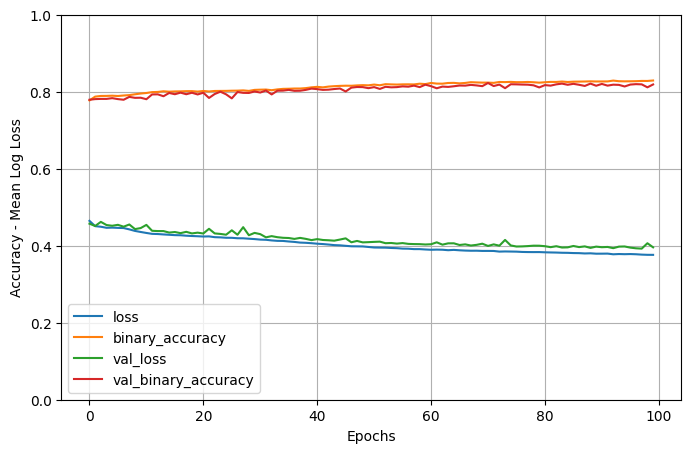

In [ ]:
%tensorboard --logdir logs/fit

## Attempt 2

In [7]:
from keras.models import Sequential

model = Sequential(name="Model_2")

model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(keras.layers.Dense(units=512, 
                             activation=keras.backend.relu, 
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dense(units=32, 
                             activation=keras.backend.tanh, 
                             kernel_initializer=keras.initializers.GlorotNormal(seed =seed)))
model.add(keras.layers.Dense(units=output_shape,
                             activation=keras.backend.sigmoid))

model.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               8704      
                                                                 
 dense_1 (Dense)             (None, 32)                16416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 25153 (98.25 KB)
Trainable params: 25153 (98.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-13 14:25:24.333174: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-13 14:25:24.333207: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-13 14:25:24.333215: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-13 14:25:24.333524: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-13 14:25:24.333973: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [11]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=1, validation_data=(
    X_val, t_val))

Epoch 1/20
907/907 [==============================] - 7s 8ms/step - loss: 0.3460 - binary_accuracy: 0.8411 - val_loss: 0.3700 - val_binary_accuracy: 0.8274
Epoch 2/20
907/907 [==============================] - 7s 8ms/step - loss: 0.3456 - binary_accuracy: 0.8410 - val_loss: 0.3713 - val_binary_accuracy: 0.8208
Epoch 3/20
907/907 [==============================] - 6s 7ms/step - loss: 0.3470 - binary_accuracy: 0.8420 - val_loss: 0.3746 - val_binary_accuracy: 0.8191
Epoch 4/20
907/907 [==============================] - 7s 7ms/step - loss: 0.3464 - binary_accuracy: 0.8409 - val_loss: 0.3718 - val_binary_accuracy: 0.8280
Epoch 5/20
907/907 [==============================] - 8s 9ms/step - loss: 0.3483 - binary_accuracy: 0.8404 - val_loss: 0.3739 - val_binary_accuracy: 0.8227
Epoch 6/20
907/907 [==============================] - 7s 8ms/step - loss: 0.3453 - binary_accuracy: 0.8446 - val_loss: 0.3645 - val_binary_accuracy: 0.8274
Epoch 7/20
907/907 [==============================] - 7s 7ms/ste

KeyboardInterrupt: 

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),
              metrics=keras.metrics.binary_accuracy)

In [ ]:
history = model.fit(X_train, t_train, batch_size=32, epochs=10, verbose=1, validation_data=(
    X_val, t_val))

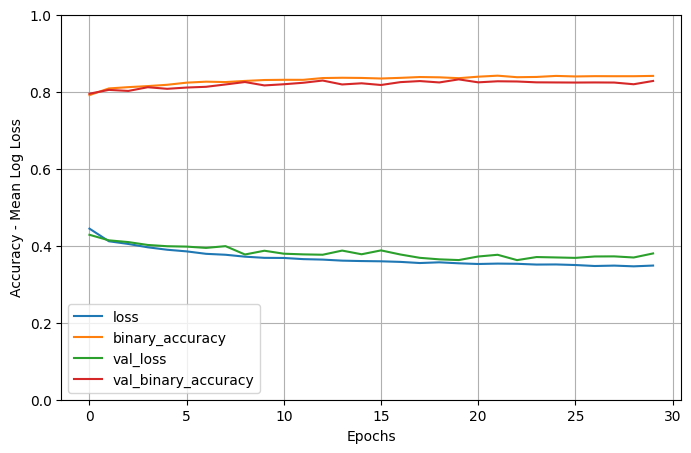

In [10]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

## Attempt 3

In [7]:
from keras.models import Sequential

model = Sequential(name="Model_2")

model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(keras.layers.Dense(units=512,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dense(units=256,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dense(units=16,
                             activation=keras.backend.tanh,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model.add(keras.layers.Dense(units=output_shape,
                             activation=keras.backend.sigmoid))

model.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               8704      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 16)                4112      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 144161 (563.13 KB)
Trainable params: 144161 (563.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-13 14:43:09.905357: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-13 14:43:09.905390: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-13 14:43:09.905400: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-13 14:43:09.905455: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-13 14:43:09.905482: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [9]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=1, validation_data=(
    X_val, t_val))

Epoch 1/20


2023-11-13 14:43:43.270808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


907/907 [==============================] - ETA: 0s - loss: 0.4644 - binary_accuracy: 0.7761

2023-11-13 14:43:53.371036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


907/907 [==============================] - 11s 11ms/step - loss: 0.4644 - binary_accuracy: 0.7761 - val_loss: 0.4353 - val_binary_accuracy: 0.7888
Epoch 2/20
907/907 [==============================] - 10s 11ms/step - loss: 0.4219 - binary_accuracy: 0.8038 - val_loss: 0.4193 - val_binary_accuracy: 0.7946
Epoch 3/20
907/907 [==============================] - 10s 11ms/step - loss: 0.4064 - binary_accuracy: 0.8088 - val_loss: 0.4195 - val_binary_accuracy: 0.7985
Epoch 4/20
907/907 [==============================] - 10s 11ms/step - loss: 0.3924 - binary_accuracy: 0.8182 - val_loss: 0.4065 - val_binary_accuracy: 0.8142
Epoch 5/20
907/907 [==============================] - 11s 12ms/step - loss: 0.3790 - binary_accuracy: 0.8286 - val_loss: 0.3888 - val_binary_accuracy: 0.8189
Epoch 6/20
907/907 [==============================] - 10s 11ms/step - loss: 0.3749 - binary_accuracy: 0.8290 - val_loss: 0.3989 - val_binary_accuracy: 0.8142
Epoch 7/20
907/907 [==============================] - 10s 11ms/

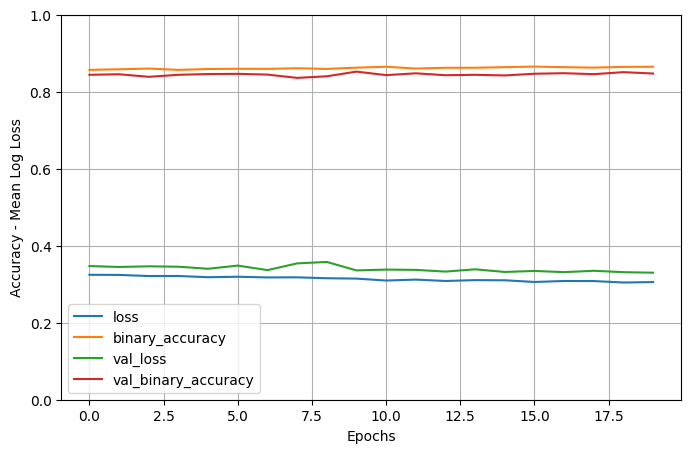

In [12]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [11]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=1, validation_data=(
    X_val, t_val), callbacks=[tensorboard_callback])

Epoch 1/20
907/907 [==============================] - 10s 11ms/step - loss: 0.3245 - binary_accuracy: 0.8568 - val_loss: 0.3472 - val_binary_accuracy: 0.8439
Epoch 2/20
907/907 [==============================] - 11s 12ms/step - loss: 0.3241 - binary_accuracy: 0.8583 - val_loss: 0.3448 - val_binary_accuracy: 0.8453
Epoch 3/20
907/907 [==============================] - 10s 11ms/step - loss: 0.3213 - binary_accuracy: 0.8602 - val_loss: 0.3465 - val_binary_accuracy: 0.8387
Epoch 4/20
907/907 [==============================] - 10s 11ms/step - loss: 0.3214 - binary_accuracy: 0.8567 - val_loss: 0.3455 - val_binary_accuracy: 0.8439
Epoch 5/20
907/907 [==============================] - 10s 11ms/step - loss: 0.3182 - binary_accuracy: 0.8590 - val_loss: 0.3401 - val_binary_accuracy: 0.8459
Epoch 6/20
907/907 [==============================] - 10s 11ms/step - loss: 0.3194 - binary_accuracy: 0.8596 - val_loss: 0.3484 - val_binary_accuracy: 0.8464
Epoch 7/20
907/907 [==============================] 

In [ ]:
%tensorboard --logdir logs/fit

## Attempt 4

In [7]:
from keras.models import Sequential

model = Sequential(name="Model_4")

model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(keras.layers.Dense(units=1024,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(rate=0.2, seed=seed))
model.add(keras.layers.Dense(units=512,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(rate=0.2, seed=seed))
model.add(keras.layers.Dense(units=64,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model.add(keras.layers.Dense(units=output_shape,
                             activation=keras.backend.sigmoid))

model.summary()

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 575105 (2.19 MB)
Trainable params: 575105 (2.

2023-11-13 15:12:26.638193: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-13 15:12:26.638221: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-13 15:12:26.638227: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-13 15:12:26.638265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-13 15:12:26.638284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [9]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))

2023-11-13 15:12:34.246247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-13 15:12:45.381985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [23]:
logs = pd.DataFrame(history.history)
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.469800,0.776537,0.464882,0.769506
1,0.435199,0.792632,0.421868,0.796802
2,0.418693,0.801902,0.417635,0.799559
3,0.402997,0.813172,0.401272,0.808382
4,0.393251,0.819307,0.390187,0.808933
5,0.389189,0.822753,0.378209,0.823821
6,0.382967,0.825303,0.377844,0.827957
7,0.374335,0.830438,0.376773,0.821064
8,0.371197,0.832472,0.369705,0.826027
9,0.366957,0.836607,0.363326,0.828784


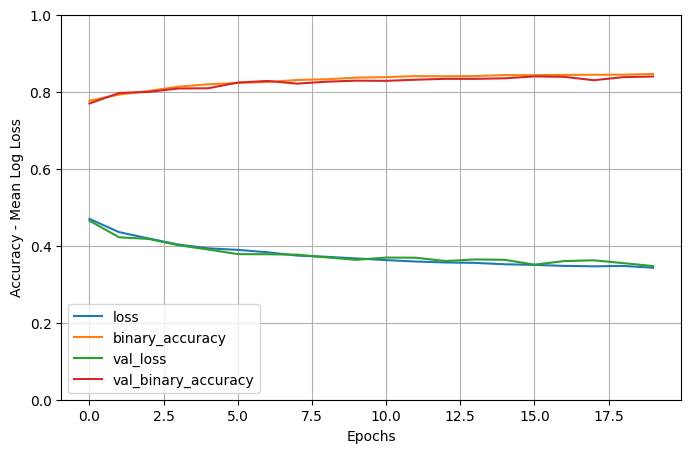

In [16]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [10]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))

In [11]:
logs = pd.DataFrame(history.history)
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.299592,0.865970,0.326425,0.852495
1,0.294560,0.870313,0.316376,0.857734
2,0.292536,0.870072,0.318040,0.856631
3,0.291360,0.871209,0.331112,0.854425
4,0.289973,0.872105,0.317807,0.853874
5,0.287864,0.872071,0.316222,0.859664
6,0.286518,0.873932,0.318204,0.857458
7,0.281365,0.875551,0.318206,0.856907
8,0.282960,0.876241,0.305511,0.862972
9,0.281852,0.875586,0.317796,0.853047


In [12]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))

In [13]:
logs = pd.DataFrame(history.history)
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.269299,0.877792,0.320810,0.862421
1,0.267803,0.879722,0.313136,0.860766
2,0.264186,0.883168,0.305086,0.865454
3,0.267035,0.880066,0.317116,0.861869
4,0.262852,0.883133,0.311590,0.859664
5,0.262109,0.882961,0.316350,0.862972
6,0.260348,0.884650,0.314164,0.863799
7,0.258249,0.883754,0.328452,0.855252
8,0.261415,0.882927,0.316800,0.861869
9,0.257504,0.885201,0.316274,0.866556


In [14]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00001),
              metrics=keras.metrics.binary_accuracy)

In [15]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))

2023-11-13 15:54:07.420516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-13 15:54:18.408806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [16]:
logs = pd.DataFrame(history.history)
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.231958,0.896023,0.314846,0.868486
1,0.226742,0.896505,0.314520,0.867384
2,0.227182,0.896436,0.313532,0.868211
3,0.226098,0.896505,0.312855,0.867108
4,0.224405,0.897401,0.312609,0.867935
5,0.223924,0.896471,0.312011,0.867384
6,0.222234,0.898435,0.312161,0.867108
7,0.222510,0.898539,0.312430,0.866281
8,0.221318,0.898332,0.312255,0.866556
9,0.220173,0.898952,0.312559,0.866556


## Attempt 5

In [7]:
from keras.models import Sequential

model = Sequential(name="Model_5")

model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(keras.layers.Dense(units=1024,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed),
                             ))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=512,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed),
                             ))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=256,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed),
                             ))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=128,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed),
                             ))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(units=32,
                             activation=keras.backend.tanh,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed),
                             ))
model.add(keras.layers.Dense(units=output_shape,
                             activation=keras.backend.sigmoid))

model.summary()

Model: "Model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3289

2023-11-13 17:23:40.268896: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-13 17:23:40.268927: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-13 17:23:40.268934: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-13 17:23:40.268978: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-13 17:23:40.268999: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [9]:
history = model.fit(X_train, t_train, batch_size=32, epochs=10, verbose=0, validation_data=(
    X_val, t_val))

2023-11-13 17:23:46.328329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-13 17:24:00.323105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [10]:
logs = pd.DataFrame(history.history)
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.529602,0.734009,0.479287,0.766474
1,0.496947,0.758271,0.530637,0.736146
2,0.495599,0.765750,0.473756,0.775296
3,0.504115,0.752757,0.522298,0.693686
4,0.542672,0.702750,0.565878,0.672181
5,0.511995,0.749276,0.512212,0.754342
6,0.529724,0.760167,0.512235,0.726496
7,0.523096,0.739558,0.541764,0.760684
8,0.540935,0.749724,0.627986,0.677419
9,0.627655,0.677281,0.624796,0.679901


In [11]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00005),
              metrics=keras.metrics.binary_accuracy)

In [12]:
history = model.fit(X_train, t_train, batch_size=32, epochs=10, verbose=0, validation_data=(
    X_val, t_val))

2023-11-13 17:26:21.029470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-13 17:26:34.791278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [13]:
logs = pd.DataFrame(history.history)
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.619090,0.681900,0.618319,0.684036
1,0.613662,0.685036,0.616352,0.686518
2,0.608346,0.688792,0.609345,0.689551
3,0.613979,0.702750,0.604229,0.703060
4,0.598618,0.713400,0.588077,0.722360
5,0.584837,0.725944,0.579407,0.725944
6,0.576273,0.729839,0.566248,0.725393
7,0.570481,0.733044,0.565541,0.744141
8,0.554246,0.749035,0.548880,0.752964
9,0.548663,0.752481,0.542589,0.750482


In [14]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00005),
              metrics=keras.metrics.binary_accuracy)
history = model.fit(X_train, t_train, batch_size=32, epochs=10, verbose=0, validation_data=(
    X_val, t_val))

2023-11-13 16:56:17.517918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-13 16:56:31.108178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [15]:
logs = pd.DataFrame(history.history)
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.332926,0.853322,0.345026,0.835677
1,0.330409,0.853460,0.343760,0.839537
2,0.328838,0.854666,0.340033,0.843121
3,0.327674,0.854080,0.342946,0.838434
4,0.325159,0.854804,0.340568,0.838434
5,0.323940,0.856217,0.338025,0.842845
6,0.322696,0.857286,0.334302,0.845327
7,0.321633,0.856734,0.339066,0.845327
8,0.318958,0.858664,0.339142,0.841191
9,0.318933,0.860112,0.339054,0.837607


## Attempt 6

In [9]:
from keras.models import Sequential

model = Sequential(name="Model_6")

model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(keras.layers.Dense(units=1024,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(rate=0.2, seed=seed))
model.add(keras.layers.Dense(units=512,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.Dropout(rate=0.2, seed=seed))
model.add(keras.layers.Dense(units=64,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model.add(keras.layers.Dense(units=output_shape,
                             activation=keras.backend.sigmoid))

model.summary()

2023-11-13 18:08:43.890733: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-13 18:08:43.890764: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-13 18:08:43.890772: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-13 18:08:43.890820: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-13 18:08:43.890843: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "Model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 575105 (2.19 MB)
Trainable params: 575105 (2.

In [10]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [11]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))

2023-11-13 18:08:50.558321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-13 18:09:02.200887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [12]:
from playsound import playsound
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.468204,0.779880,0.431331,0.797629
1,0.414797,0.805452,0.406720,0.803419
2,0.394631,0.818548,0.398920,0.817204
3,0.381382,0.825958,0.383542,0.817204
4,0.373647,0.828543,0.378511,0.825200
5,0.362887,0.833954,0.363096,0.837055
6,0.359438,0.838779,0.355648,0.837607
7,0.349624,0.844121,0.361569,0.835953
8,0.345147,0.846154,0.354164,0.842294
9,0.337640,0.852185,0.340909,0.840088


+10 epochs

In [18]:
history = model.fit(X_train, t_train, batch_size=32, epochs=10, verbose=0, validation_data=(
    X_val, t_val))

These are the results after 30 epochs in total : 
binary_a : 88%, val_binary_a : 86%

In [19]:
from playsound import playsound
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.283066,0.875689,0.321551,0.853047
1,0.284437,0.874862,0.316814,0.856631
2,0.281925,0.874724,0.317403,0.862972
3,0.282990,0.875414,0.331581,0.863799
4,0.277644,0.877412,0.323167,0.853874
5,0.278138,0.876654,0.334071,0.848635
6,0.276325,0.878688,0.305320,0.861042
7,0.275000,0.879067,0.318316,0.858285
8,0.277591,0.876827,0.316628,0.858285
9,0.272898,0.877688,0.330396,0.858009


In [20]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00001),
              metrics=keras.metrics.binary_accuracy)

In [21]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))

2023-11-13 18:20:56.998292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-13 18:21:08.348788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [22]:
from playsound import playsound
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.266111,0.881169,0.318962,0.864075
1,0.257508,0.884926,0.314692,0.863248
2,0.254927,0.886614,0.312973,0.865178
3,0.251554,0.887924,0.313022,0.864351
4,0.250687,0.887683,0.312810,0.863524
5,0.248436,0.889165,0.313074,0.864075
6,0.246573,0.889509,0.312898,0.864075
7,0.246212,0.889337,0.312383,0.864626
8,0.246200,0.890612,0.312612,0.863799
9,0.245028,0.891060,0.312366,0.864902


## Attempt 7

In [6]:
from keras.models import Sequential

model = Sequential(name="Model_6")

model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(keras.layers.Dense(units=1024,
                             activation=keras.backend.elu,
                             kernel_initializer=keras.initializers.HeNormal(seed=seed)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=0.2, seed=seed))
model.add(keras.layers.Dense(units=512,
                             activation=keras.backend.tanh,
                             kernel_initializer=keras.initializers.GlorotNormal(seed=seed)))
model.add(keras.layers.Dropout(rate=0.2, seed=seed))
model.add(keras.layers.Dense(units=output_shape,
                             activation=keras.backend.sigmoid))

model.summary()

Model: "Model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              17408     
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                           

2023-11-13 20:06:08.285963: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-13 20:06:08.285988: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-13 20:06:08.285994: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-13 20:06:08.286248: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-13 20:06:08.286274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [8]:
history = model.fit(X_train, t_train, batch_size=32, epochs=20, verbose=0, validation_data=(
    X_val, t_val))

2023-11-13 20:06:25.696593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-13 20:06:36.147485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [9]:
from playsound import playsound
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.470911,0.785429,0.412369,0.811139
1,0.418034,0.807589,0.391082,0.824097
2,0.407265,0.813138,0.394949,0.814723
3,0.399549,0.819203,0.397250,0.826854
4,0.396215,0.821547,0.399706,0.805900
5,0.392667,0.823684,0.378584,0.823546
6,0.389520,0.824648,0.379125,0.831541
7,0.383494,0.830473,0.375494,0.831817
8,0.383965,0.827785,0.372683,0.827130
9,0.378715,0.830714,0.374516,0.826578


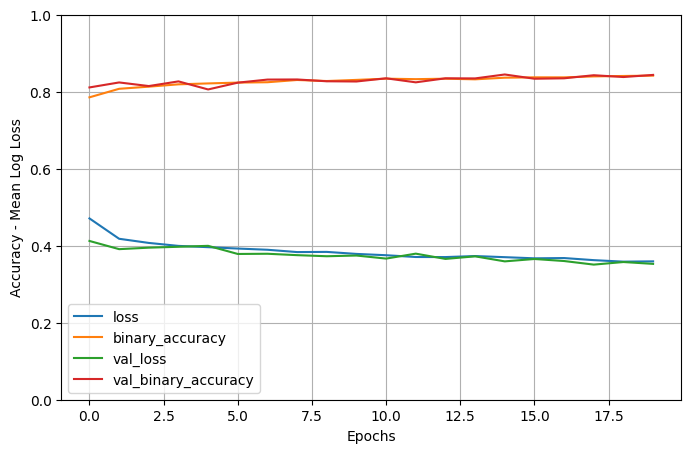

In [10]:
results = pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [13]:
from playsound import playsound
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00001),
              metrics=keras.metrics.binary_accuracy)
history = model.fit(X_train, t_train, batch_size=1, epochs=5, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

2023-11-13 18:42:33.767778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-13 18:42:49.667768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.295853,0.868348,0.308830,0.858285
1,0.295672,0.869520,0.308501,0.855252
2,0.296771,0.869107,0.308358,0.857734
3,0.297199,0.868038,0.308254,0.858285
4,0.295307,0.868211,0.308620,0.858561
5,0.295632,0.868452,0.307886,0.857458
6,0.293243,0.870382,0.307808,0.859112
7,0.295292,0.870278,0.308000,0.857458
8,0.296602,0.869486,0.308070,0.856907
9,0.295017,0.871002,0.308057,0.858009


In [14]:
from playsound import playsound
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00001),
              metrics=keras.metrics.binary_accuracy)
history = model.fit(X_train, t_train, batch_size=1, epochs=5, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

2023-11-13 18:48:46.872611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-13 18:55:06.620822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.639569,0.657051,3826.908936,0.784946
1,0.632667,0.672353,3987.449219,0.787703
2,0.632631,0.672353,3691.603760,0.793493
3,0.632662,0.672353,3307.950439,0.785222
4,0.632681,0.672353,3617.847168,0.789358


## Attempt 8

In [7]:
from keras.models import Sequential

model = Sequential(name='Model8')

model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Dense(units=32, activation=keras.activations.relu))
model.add(keras.layers.Dense(units=1, activation=keras.activations.sigmoid))

model.summary()

Model: "Model8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-14 11:09:14.994265: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-14 11:09:14.994302: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-14 11:09:14.994310: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-14 11:09:14.994567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-14 11:09:14.994606: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.RMSprop(learning_rate=0.001),
              metrics=keras.metrics.binary_accuracy)

In [9]:
from playsound import playsound
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00001),
              metrics=keras.metrics.binary_accuracy)
history = model.fit(X_train, t_train, batch_size=1, epochs=5, verbose=0, validation_data=(
    X_val, t_val))
logs = pd.DataFrame(history.history)
playsound('/Users/paul/Downloads/joyous-chime-notification.mp3')
logs

2023-11-14 11:09:22.293086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 